In [1]:
# Multifaceted Machine Learning Approach in Business Intelligence
# Customer Churn Problem

In [2]:
# This notebook demonstrates:
# - Data preparation and EDA 
# - Classification, regression interpretation, and clustering 
# - End-to-end analytical workflow with business interpretation 

In [3]:
## 1. Import Required Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

sns.set(style="whitegrid")

In [4]:
## 2. load Dataset

df = pd.read_excel("WA_Fn-UseC_-Telco-Customer-Churn.xlsx")

In [5]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
## 3. Data cleaning 

# Check data types and missing values

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Convert TotalCharges to numeric (it is stored as object)

df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [9]:
df['TotalCharges'].isnull().sum()

np.int64(11)

In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [11]:
# Drop rows with missing TotalCharges

df = df.dropna(subset=['TotalCharges'])

In [12]:
df['TotalCharges'].isnull().sum()

np.int64(0)

In [13]:
# Drop customerID as it has no predictive value

df.drop(columns=['customerID'], inplace=True)

In [14]:
## 4. Encode 

binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']


for col in binary_cols:
    df[col] = df[col].map({'Yes': 1, 'No': 0})

In [15]:
df_encoded = pd.get_dummies(df, drop_first=True)

print(df_encoded.shape)

(7032, 31)


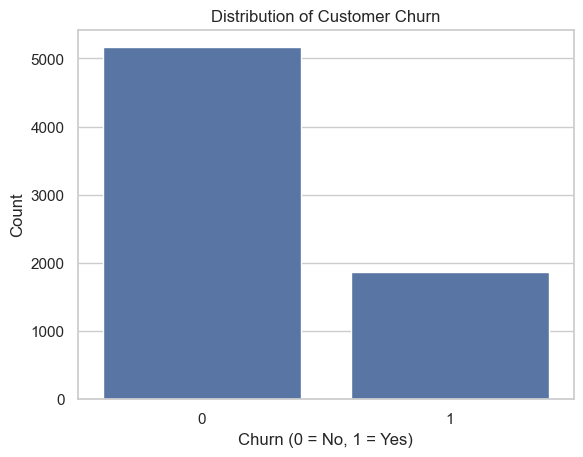

In [16]:
## 5. Exploratory Data Analysis

# Churn Distribution

plt.figure()
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Customer Churn')
plt.xlabel('Churn (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.show()

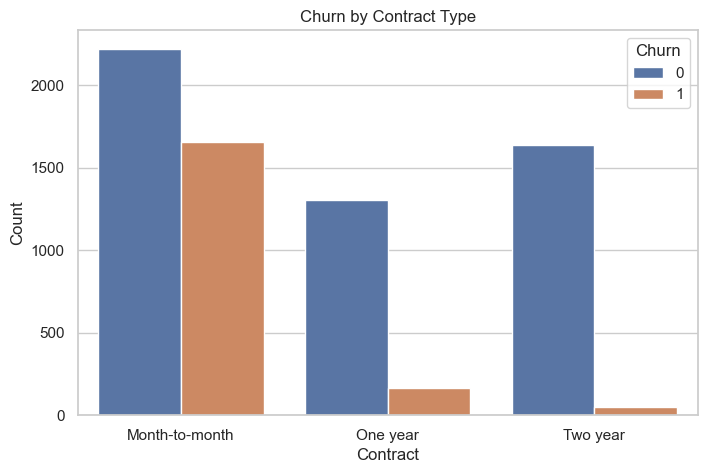

In [17]:
# Churn by contract type

plt.figure(figsize=(8,5))
sns.countplot(x='Contract', hue='Churn', data=df)
plt.title('Churn by Contract Type')
plt.ylabel('Count')
plt.show()

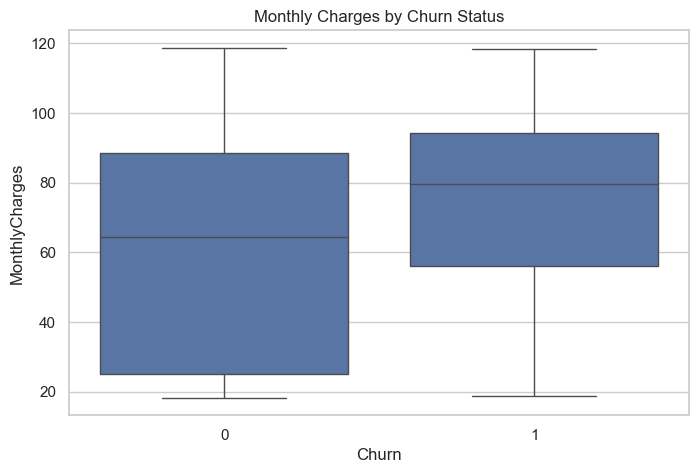

In [18]:
# Monthly Charges vs Churn

plt.figure(figsize=(8,5))
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)
plt.title('Monthly Charges by Churn Status')
plt.show()

In [19]:
## 6. Logistic Regression - Classification Model
# Logistic Regression was selected as the primary supervised learning model due to its interpretability and 
# suitability for binary classification problems such as customer churn. 
# The model estimates the probability of churn based on customer attributes, enabling both prediction and explanatory analysis.

X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

In [20]:
# Train-test split
# Splitting the dataset ensures the model is evaluated on unseen customers,
# reflecting real-world predictive performance rather than memorisation


X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.3, random_state=42, stratify=y
)

In [21]:
# Feature scaling

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [22]:
# Logistic Regression model

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [23]:
y_pred = log_reg.predict(X_test_scaled)

In [24]:
# Precision, recall and F1-score provide a more informative evaluation than accuracy
# in churn problems due to class imbalance and the high cost of missed churners


print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



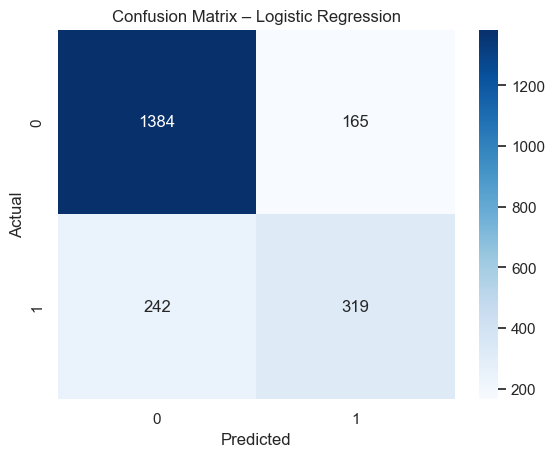

In [25]:
# Confusion Matrix

cm = confusion_matrix(y_test, y_pred)
plt.figure()
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix – Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [26]:
## 7. Probability-Based Regression Interpretation
# Beyond binary classification, the Logistic Regression model is interpreted probabilistically to generate churn risk scores. 
# This approach allows customers to be ranked by churn likelihood, supporting risk-based prioritisation of retention strategies.

# Predicted churn probabilities

churn_prob = log_reg.predict_proba(X_test_scaled)[:, 1]

In [27]:
# Risk score dataframe

risk_df = X_test.copy()
risk_df['Actual_Churn'] = y_test.values
risk_df['Churn_Probability'] = churn_prob

In [28]:
risk_df_sorted = risk_df.sort_values(by='Churn_Probability', ascending=False)

risk_df_sorted.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,gender_Male,MultipleLines_No phone service,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Actual_Churn,Churn_Probability
3380,1,1,0,1,1,1,95.10,95.10,True,False,...,True,False,True,False,False,False,True,False,1,0.854198
6368,1,0,0,2,1,1,94.00,181.70,True,False,...,True,False,True,False,False,False,True,False,1,0.851042
3159,1,0,0,3,1,1,94.85,335.75,True,False,...,True,False,True,False,False,False,True,False,0,0.847146
2631,1,1,0,7,1,1,99.25,665.45,True,False,...,True,False,True,False,False,False,True,False,1,0.832877
4585,1,0,0,1,1,1,85.05,85.05,False,False,...,False,False,True,False,False,False,True,False,1,0.822264


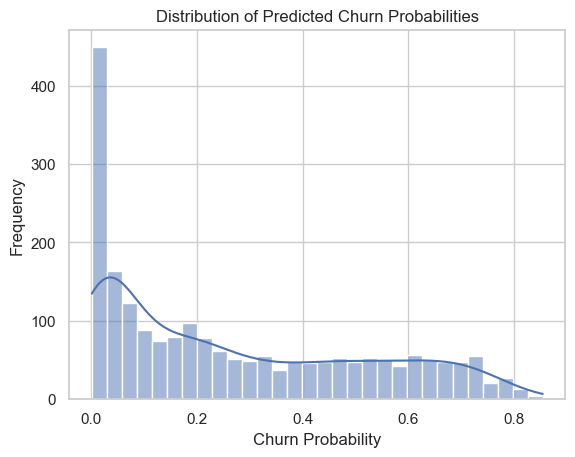

In [29]:
# Distribution of Churn Risk Scores

plt.figure()
sns.histplot(churn_prob, bins=30, kde=True)
plt.title('Distribution of Predicted Churn Probabilities')
plt.xlabel('Churn Probability')
plt.ylabel('Frequency')
plt.show()

In [30]:
## 8. K-Means Clustering (Unsupervised Learning)
# K-Means clustering is applied as an unsupervised learning technique to identify homogeneous customer segments based 
# on behavioural and financial characteristics. This approach complements supervised models by uncovering latent patterns in the data.


cluster_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_cluster = df[cluster_features]

In [31]:
# K-Means is distance-based, so feature scaling prevents variables with larger ranges
# (e.g. monthly charges) from dominating the clustering outcome


scaler_cluster = StandardScaler()
X_cluster_scaled = scaler_cluster.fit_transform(X_cluster)

In [32]:
inertia = []
k_range = range(1, 11)


for k in k_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_cluster_scaled)
    inertia.append(km.inertia_)

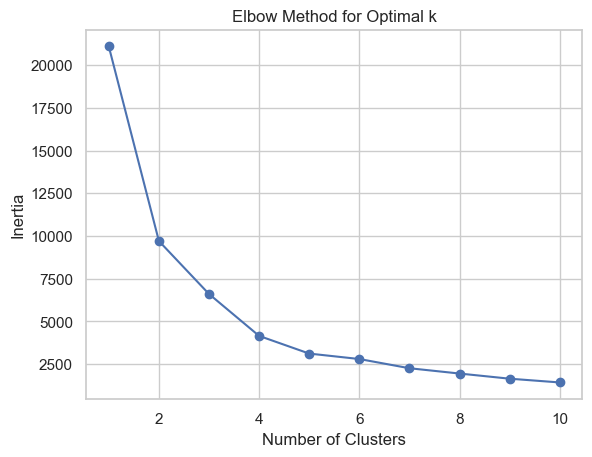

In [33]:
# Elbow Plot

plt.figure()
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [34]:
# Apply K-Means with chosen k (e.g., 3)

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X_cluster_scaled)

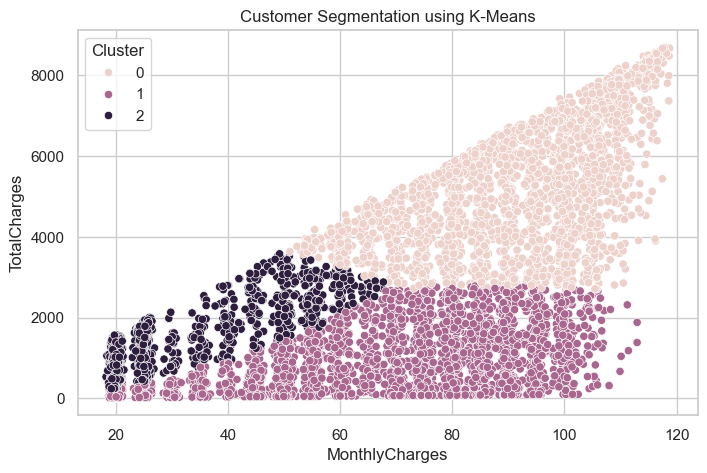

In [35]:
# Cluster Visualisation

plt.figure(figsize=(8,5))
sns.scatterplot(x='MonthlyCharges', y='TotalCharges', hue='Cluster', data=df)
plt.title('Customer Segmentation using K-Means')
plt.show()

In [36]:
cluster_summary = df.groupby('Cluster')[cluster_features + ['Churn']].mean()
cluster_summary

,tenure,MonthlyCharges,TotalCharges,Churn
Cluster,,,,
0,57.134537,91.568871,5223.116817,0.167043
1,10.791692,62.579632,752.216109,0.424387
2,44.410605,29.533990,1339.258906,0.053705


In [ ]:
## 9. Cluster Interpretation

#The resulting clusters exhibit distinct behavioural profiles. For example, one cluster is characterised by higher monthly charges and 
# shorter tenure, indicating a segment with elevated churn risk. Such insights enable the design of targeted, 
# segment-specific retention strategies.
